In [1]:
### Import necessary modules
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sys

In [2]:

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing-
import globalfunction.pp as pp  # importing

import numpy as np
import pandas as pd

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sys
import sklearn.metrics

from sklearn.linear_model import LinearRegression

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing

In [3]:
df, data_version_description, numeric_cols, cat_cols = vv.dataset_modelling_version(iteration_code="0053_20220716", row_limit=0)
print(data_version_description)
print(df.shape)
df.sample(20)

/media/sf_shared_files/Springboard_III/capstone_prep/globalfunction/vv.py:439: DtypeWarning: Columns (23,25,28,31,40,43,44,47,51,56,59,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df_json1 = pd.read_csv(LISTING_JSON_MODEL_FILE)  # EDIT 29-06-2022: There are bid listings and regular listings. I scrape them seporately and join them here.


remove duplicates: 24143/49617/44393/44954/16764 ==> 24143/40079/39870/39886/16764
type <class 'pandas.core.indexes.base.Index'>
22254
21862
21829
21801
Shared ownership houses predict significantly higher than they should. I'm removing all the shared ownership properties I can find.
(21801, 16)


,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,property_age,borough_name,analyticsProperty.propertyType,propertySubType,coarse_compass_direction,tenure.tenureType,analyticsProperty.priceQualifier
ids,,,,,,,,,,,,,,,,
124284719,495000.0,51.502277,-0.025418,0.2,1.0,1.0,10,20220624,4.0,13.0,Tower Hamlets,Flats / Apartments,Apartment,E,LEASEHOLD,Guide Price
114106658,465000.0,51.432098,-0.334409,0.5,2.0,1.0,13,20210928,4.0,NaN,Richmond upon Thames,Flats / Apartments,Apartment,TW,SHARE_OF_FREEHOLD,None
119182244,550000.0,51.413899,-0.074846,0.3,3.0,1.0,9,20220126,4.0,37.0,Croydon,Flats / Apartments,Flat,SE,SHARE_OF_FREEHOLD,Offers Over
116027927,300000.0,51.487008,-0.114857,0.4,2.0,1.0,20,20211108,9.0,37.0,Lambeth,Flats / Apartments,Maisonette,SE,LEASEHOLD,None
96299030,575000.0,51.43499,0.019610,0.3,4.0,1.0,18,20200820,4.0,NaN,Lewisham,Houses,Semi-Detached,SE,FREEHOLD,None
79304961,365000.0,51.533435,-0.388296,1.4,2.0,1.0,11,20210401,4.0,37.0,Ealing,Houses,Terraced,UB,FREEHOLD,Guide Price
96552169,600000.0,51.59733,-0.008140,0.8,4.0,3.0,18,20220509,4.0,37.0,Waltham Forest,Houses,Terraced,E,FREEHOLD,Offers in Excess of
120685283,290000.0,51.39884,-0.297400,0.5,1.0,1.0,8,20220304,4.0,37.0,Kingston upon Thames,Flats / Apartments,Flat,KT,SHARE_OF_FREEHOLD,Offers in Excess of
85656489,525000.0,51.527143,-0.445233,1.7,3.0,2.0,13,20220613,4.0,37.0,Hillingdon,Houses,Semi-Detached,UB,FREEHOLD,Guide Price


In [4]:
df = vv.tidy_dataset(df, coerce_to_float=['location.latitude'], na_infer_median=['bedrooms_model', 'bathrooms_model'], na_drop_column=['property_age'],
                     na_drop_rows=['analyticsProperty.imageCount', 'analyticsProperty.added'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21801 entries, 85780593 to 114438299
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Price                             21801 non-null  float64
 1   location.latitude                 21799 non-null  float64
 2   location.longitude                21801 non-null  float64
 3   distance_to_any_train             21801 non-null  float64
 4   bedrooms_model                    21801 non-null  float64
 5   bathrooms_model                   21801 non-null  float64
 6   analyticsProperty.imageCount      21801 non-null  int64  
 7   analyticsProperty.added           21801 non-null  int64  
 8   floorplan_count                   21801 non-null  float64
 9   borough_name                      21801 non-null  object 
 10  analyticsProperty.propertyType    21801 non-null  object 
 11  propertySubType                   21799 non-null  object 
 12

In [21]:
sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name,analyticsProperty.propertyType,propertySubType,coarse_compass_direction,tenure.tenureType,analyticsProperty.priceQualifier
ids,,,,,,,,,,,,,,,
85170690,500000.0,51.514840,-0.432590,1.0,4.0,1.0,14,20220505,4.0,Hillingdon,Houses,Semi-Detached,UB,NaN,None
104183660,500000.0,51.545131,-0.439493,0.7,4.0,2.0,13,20210316,4.0,Hillingdon,Houses,End of Terrace,UB,NaN,Guide Price
106171337,500000.0,51.596492,-0.398523,0.5,2.0,2.0,17,20210429,4.0,Hillingdon,Houses,End of Terrace,HA,NaN,Offers in Excess of
124690724,500000.0,51.499580,-0.435130,0.7,3.0,1.0,18,20220705,4.0,Hillingdon,Houses,Semi-Detached,UB,NaN,None
124933595,500000.0,51.526210,-0.447270,1.6,3.0,1.0,17,20220713,4.0,Hillingdon,Houses,Semi-Detached,UB,NaN,Offers in Excess of
84995322,500000.0,51.482720,-0.424470,1.1,3.0,1.0,9,20220428,4.0,Hillingdon,Houses,Semi-Detached,UB,NaN,None
116741378,500000.0,51.615757,-0.441540,0.8,2.0,1.0,13,20211123,4.0,Hillingdon,Houses,Semi-Detached,HA,NaN,Guide Price
109734920,500000.0,51.507920,-0.406600,0.7,3.0,1.0,18,20210630,4.0,Hillingdon,Houses,Terraced,UB,NaN,None
125008355,500000.0,51.529630,-0.416220,1.8,3.0,2.0,14,20220715,4.0,Hillingdon,Houses,End of Terrace,UB,NaN,Offers Over


In [22]:
df.dropna(inplace=True)

In [23]:
y = df['Price']
X = df.drop(['Price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [24]:
if False:
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler

    from sklearn.base import BaseEstimator, TransformerMixin

    # column index
    rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6


    class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
        def __init__(self, add_bedrooms_per_room=True):  # no *args or **kargs
            self.add_bedrooms_per_room = add_bedrooms_per_room

        def fit(self, X, y=None):
            return self  # nothing else to do

        def transform(self, X):

            return X

            rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
            population_per_household = X[:, population_ix] / X[:, households_ix]
            if self.add_bedrooms_per_room:
                bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
                return np.c_[X, rooms_per_household, population_per_household,
                             bedrooms_per_room]
            else:
                return np.c_[X, rooms_per_household, population_per_household]


    # num_pipeline = Pipeline([
    #     ('imputer', SimpleImputer(strategy='median')),
    #     ('attribs_adder', CombinedAttributesAdder())
    #     ('std_scaler', StandardScaler())
    # ])

    num_pipeline = Pipeline([
        #('imputer', SimpleImputer(strategy="median")),
        #('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

    df = num_pipeline.fit_transform(df)
else:
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.pipeline import Pipeline
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.compose import ColumnTransformer

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])  # define the transformer for categorical columns

    numeric_no_scale_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
    ])  # define the transformer for categorical columns

    categorical_transformer1 = Pipeline(steps=[
        #('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
    ])

    categorical_transformer2 = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ])
    features_preprocessor = ColumnTransformer(
        transformers=[
            ('numeric', numeric_transformer,
             ['location.latitude', 'location.longitude', 'distance_to_any_train', 'bedrooms_model', 'bathrooms_model', 'analyticsProperty.imageCount', 'analyticsProperty.added',
              'floorplan_count']),
            ('categorical1', categorical_transformer1,
             ['borough_name', 'analyticsProperty.propertyType', 'propertySubType', 'coarse_compass_direction', 'tenure.tenureType', 'analyticsProperty.priceQualifier']),  #
            ('categorical2', categorical_transformer2, [])
        ])
    features_noscale_preprocessor = ColumnTransformer(
        transformers=[
            ('numeric', numeric_no_scale_transformer,
             ['location.latitude', 'location.longitude', 'distance_to_any_train', 'bedrooms_model', 'bathrooms_model', 'analyticsProperty.imageCount', 'analyticsProperty.added',
              'floorplan_count']),
            ('categorical1', categorical_transformer1, ['borough_name', 'analyticsProperty.propertyType', 'propertySubType', 'coarse_compass_direction', 'tenure.tenureType']),
            ('categorical2', categorical_transformer2, [])
        ])
features_preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['location.latitude', 'location.longitude',
                                  'distance_to_any_train', 'bedrooms_model',
                                  'bathrooms_model',
                                  'analyticsProperty.imageCount',
                                  'analyticsProperty.added',
                                  'floorplan_count']),
                                ('categorical1',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['borough_name',
                                  'analyticsProperty.propertyType',
                                  'propertySubType', 'coarse_compass_direction',
                                  'tenure.tenureType',
                                  'analyticsProperty.priceQualifier']),
                                ('categorical2',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 [])])

In [25]:
features_noscale_preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['location.latitude', 'location.longitude',
                                  'distance_to_any_train', 'bedrooms_model',
                                  'bathrooms_model',
                                  'analyticsProperty.imageCount',
                                  'analyticsProperty.added',
                                  'floorplan_count']),
                                ('categorical1',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['borough_name',
                                  'analyticsProperty.propertyType',
                                  'propertySubType', 'coarse_compass_direction',
                                  'tenure.tenureType']),
                                ('categorical2',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 [])])

Fitting 3 folds for each of 9 candidates, totalling 27 fits

Best Score
 -74782.13513504628


KNeighborsRegressor(leaf_size=1, n_neighbors=350)

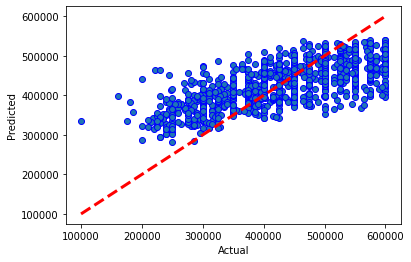

In [26]:
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

model_tuple = ('NEW - Ridge LR', linear_model.Ridge(),
               [{"estimator__alpha": [.005, .05, .5, 5, 50, 500, 5000, 50000, 500000]}])
model_tuple = ('KNN', KNeighborsRegressor(), [
        {
            'estimator__n_neighbors': [250,300,350],
            #"estimator__weights": ['uniform', 'distance'],
            #'estimator__algorithm': ['auto', 'ball_tree', 'kd_tree'], #, 'brute'],
            'estimator__leaf_size': [1,2,3],  #, 30, 120],
            # 'estimator__p': [1, 2],
        }
    ], 15, 3)
model = model_tuple[1]
model.get_params()

params = model_tuple[2]

pipe = Pipeline(steps=[
    ('preprocessor', features_preprocessor),  # preprocess features
    ('estimator', model),
])  # start the training
#print(pipe.get_params())
from sklearn.model_selection import GridSearchCV

#grid = GridSearchCV(pipe, param_grid=params, cv=3, n_jobs=1, verbose=1, scoring='neg_root_mean_squared_error')
#grid = GridSearchCV(pipe, param_grid=params, cv=3, n_jobs=1, verbose=1, scoring='neg_mean_squared_error')
#grid = GridSearchCV(pipe, param_grid=params, cv=3, n_jobs=1, verbose=1, scoring='neg_mean_absolute_error')
grid = GridSearchCV(pipe, param_grid=params, cv=3, n_jobs=1, verbose=1, scoring='neg_mean_absolute_error')
grid.fit(X, y)
print("\nBest Score\n", grid.best_score_)
best_estimator_pipe = grid.best_estimator_

fig, ax = plt.subplots()
ax.scatter(y_test, best_estimator_pipe.predict(X_test), edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_ylabel('Predicted')
ax.set_xlabel('Actual')

best_estimator_pipe[1]

In [27]:
best_estimator_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['location.latitude',
                                                   'location.longitude',
                                                   'distance_to_any_train',
                                                   'bedrooms_model',
                                                   'bathrooms_model',
                                                   'analyticsProperty.imageCount',
                                                   'analyticsProperty.added',
                                                   'floorplan_count']),
                                                 ('cate...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['borough_name',
                                                   'analyticsProperty.propertyType',
                                                   'propertySubType',
                                                   'coarse_compass_direction',
                                                   'tenure.tenureType',
                                                   'analyticsProperty.priceQualifier']),
                                                 ('categorical2',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  [])])),
                ('estimator',
                 KNeighborsRegressor(leaf_size=1, n_neighbors=350))])

In [28]:
def do_grid_or_random_search(model_tuple, cv_type='grid'):
    if cv_type == 'grid':
        name, model, params = model_tuple
    else:
        name, model, params, p_nIter, p_fold = model_tuple

    if 'noscale' in name:
        pipe = Pipeline(steps=[
            ('preprocessor', features_noscale_preprocessor),  # preprocess features
            ('estimator', model),
        ])  # start the training
    else:
        pipe = Pipeline(steps=[
            ('preprocessor', features_preprocessor),
            ('estimator', model),  # preprocess features
        ])  # start the training

    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import RandomizedSearchCV

    if cv_type == 'grid':
        grid = GridSearchCV(pipe, param_grid=params, cv=3, n_jobs=1, verbose=1, scoring='neg_root_mean_squared_error')
    else:
        grid = RandomizedSearchCV(pipe, param_distributions=params, cv=p_fold, n_jobs=1, verbose=1, scoring='neg_root_mean_squared_error', n_iter=p_nIter)

    grid.fit(X, y)
    print("\nBest Score\n", grid.best_score_)
    print("\nBest Estimator\n", )
    best_estimator_pipeline = grid.best_estimator_
    best_estimator = best_estimator_pipeline.steps[1]
    print(best_estimator)
    print(grid.cv_results_)
    return best_estimator


In [29]:
#do_grid_search(('NEW - Ridge LR', linear_model.Ridge()))

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from xgboost import XGBClassifier
from sklearn import model_selection

h = -1
model_tuples = [
    ('NEW - Ridge LR noscale', linear_model.Ridge(), [{"estimator__alpha": [.005, .05, .5, 5, 50, 500, 5000, 50000, 500000]}]),
    ('LinR', LinearRegression(), [{"estimator__normalize": [True, False]}]),
    ('LinR Dupl', LinearRegression(), [{"estimator__normalize": [True, False]}]),
    ('LinR noscale', LinearRegression(), [{"estimator__normalize": [True, False]}]),
    ('NEW - Ridge LR', linear_model.Ridge(alpha=.5), [
        {"estimator__max_iter": [5, 50, 100], 'estimator__alpha': [5, 50, 500, 5000], 'estimator__normalize': [True, False]}
    ]),
    ('NEW - Ridge LR noscale', linear_model.Ridge(alpha=.5), [
        {"estimator__max_iter": [5, 50, 100], 'estimator__alpha': [5, 50, 500, 5000], 'estimator__normalize': [True, False]}
    ]),
    ('KNN', KNeighborsRegressor(), [
        {
            #'estimator__n_neighbors': range(5,100,5),
            'estimator__n_neighbors': [200, 250, 300, 350, 400, 500],
            #'estimator__n_neighbors': range(100,300,10),
            "estimator__weights": ['uniform', 'distance'],
            #'estimator__algorithm': ['auto', 'ball_tree', 'kd_tree'], #, 'brute'],
            'estimator__leaf_size': [3, 5, 9, 15, 30, 120],  #, 30, 120],
            # 'estimator__p': [1, 2],
            #'estimator__':[]
        }
    ], 15, 3),
    ('KNN noscale', KNeighborsRegressor(), [
        {
            #'estimator__n_neighbors': range(5,100,5),
            'estimator__n_neighbors': [200, 250, 300, 350, 400, 500],
            #'estimator__n_neighbors': range(100,300,10),
            "estimator__weights": ['uniform', 'distance'],
            #'estimator__algorithm': ['auto', 'ball_tree', 'kd_tree'], #, 'brute'],
            'estimator__leaf_size': [3, 5, 9, 15, 30, 120],  #, 30, 120],
            # 'estimator__p': [1, 2],
            #'estimator__':[]
        }
    ], 15, 3),
    ('GNB', GaussianNB(), [
        {
            "estimator__var_smoothing": [1e-9,1e-10,1e-8,1e-7,1e-6,1e-5,1e-4,0.001,0.01,0.1,1,10,100,1000]
            #'estimator__':[]
        }
    ]),
    #('GNB noscale', GaussianNB(), [{"estimator__priors": [.005]}]),
    ('RF', RandomForestRegressor(), [
        {
            # 'estimator__bootstrap': [],
            # 'estimator__ccp_alpha': [],
            # 'estimator__criterion': [],
            'estimator__max_depth': [None,1,3,5,7],
            'estimator__max_features': ['sqrt', 'log2', None,1,5,10,50,100,500,1000],
            'estimator__max_leaf_nodes': [None,1,3,5,9],
            'estimator__max_samples': [None,1,3,9],
            # 'estimator__min_impurity_decrease': [],
            'estimator__min_samples_leaf': [1,2,4,8,16],
            'estimator__min_samples_split': [2,4,8,16],
            # 'estimator__min_weight_fraction_leaf': [],
            'estimator__n_estimators': [50,100,200,300,400,500],
            # 'estimator__n_jobs': [],
            # 'estimator__oob_score': [],
            # 'estimator__random_state': [],
            # 'estimator__verbose': [],
            # 'estimator__warm_start':[]
            #'estimator__':[]
        }
    ], 60, 3),
    #('SVM', SVR()),
    #('XGB', XGBClassifier())
]

h = 9
print("h=", h)
do_grid_or_random_search(model_tuples[h],cv_type='random')
#do_grid_or_random_search(model_tuples[h], cv_type='grid')

h= 9
Fitting 3 folds for each of 60 candidates, totalling 180 fits



KeyboardInterrupt



In [ ]:
h = 4
print("h=", h)
do_grid_search(model_tuples[h])

In [ ]:
h += 1
print("h=", h)
do_grid_search(model_tuples[h])

In [ ]:
h += 1
h = 1
print("h=", h)
do_grid_search(model_tuples[h])

In [ ]:
h += 1
h = 2
do_grid_search(model_tuples[h])

In [ ]:
h += 1
print("h=", h)
do_grid_search(model_tuples[h])

In [ ]:
h += 1
print("h=", h)
do_grid_search(model_tuples[h])

In [ ]:
h += 1
print("h=", h)
do_grid_search(model_tuples[h])

In [ ]:
h += 1
print("h=", h)
do_grid_search(model_tuples[h])

In [ ]:
h += 1
h = 4
print("h=", h)
do_grid_search(model_tuples[h])

In [ ]:
h += 1
print("h=", h)
do_grid_search(model_tuples[h])